
# Statistical Analysis

### Objectives:
- Summarize distributions of pollutants (PM2.5, PM10, NO₂).
- Compare regions and station types.
- Assess temporal trends (2010–2023).
- Test hypotheses with inferential statistics (t-tests, Mann–Whitney, ANOVA).

## Load and Inspect Data

In [43]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(
    r"C:\Users\Mollean\Desktop\Global Air Quality Analysis\who_aq_clean\who_aq_2024_long_clean.csv"
)  

df['year'] = df['year'].astype(int)

print("Shape:", df.shape)
df

Shape: (77335, 20)


,who_region,iso3,country_name,city,year,version,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms,unit,source,dataset_version,pollutant,concentration,temporal_coverage_pct
0,4_Eur,ESP,Spain,A Coruna/ESP,2013,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...","Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1,µg/m³,"WHO Ambient Air Quality Database (v6.1, Jan 2024)",2024_v6.1,pm25,11.491,46.0
1,4_Eur,ESP,Spain,A Coruna/ESP,2014,"V6.0 (2023), V6.0 (2023), V6.0 (2023)","Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1,µg/m³,"WHO Ambient Air Quality Database (v6.1, Jan 2024)",2024_v6.1,pm25,15.878,88.0
2,4_Eur,ESP,Spain,A Coruna/ESP,2015,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...","Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,µg/m³,"WHO Ambient Air Quality Database (v6.1, Jan 2024)",2024_v6.1,pm25,14.004,71.0
3,4_Eur,ESP,Spain,A Coruna/ESP,2016,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...","Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,µg/m³,"WHO Ambient Air Quality Database (v6.1, Jan 2024)",2024_v6.1,pm25,13.160,98.0
4,4_Eur,ESP,Spain,A Coruna/ESP,2017,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...","Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,µg/m³,"WHO Ambient Air Quality Database (v6.1, Jan 2024)",2024_v6.1,pm25,14.114,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77330,6_Wpr,KOR,Republic of Korea,경기도/KOR,2015,V5.0 (2022),NaN,NaN,NaN,NaN,NaN,37.337175,126.724103,1,µg/m³,"WHO Ambient Air Quality Database (v6.1, Jan 2024)",2024_v6.1,no2,0.032,NaN
77331,6_Wpr,KOR,Republic of Korea,경기도/KOR,2016,V5.0 (2022),NaN,NaN,NaN,NaN,NaN,37.337200,126.724100,1,µg/m³,"WHO Ambient Air Quality Database (v6.1, Jan 2024)",2024_v6.1,no2,0.031,NaN
77332,6_Wpr,KOR,Republic of Korea,경기도/KOR,2017,V5.0 (2022),NaN,NaN,NaN,NaN,NaN,37.337200,126.724100,1,µg/m³,"WHO Ambient Air Quality Database (v6.1, Jan 2024)",2024_v6.1,no2,0.029,NaN
77333,6_Wpr,KOR,Republic of Korea,경기도/KOR,2018,V5.0 (2022),NaN,NaN,NaN,NaN,NaN,37.337200,126.724100,1,µg/m³,"WHO Ambient Air Quality Database (v6.1, Jan 2024)",2024_v6.1,no2,0.027,NaN


## Descriptive Statistics

In [44]:
# Summary statistics for each pollutant
desc = df.groupby("pollutant")["concentration"].describe()
desc

,count,mean,std,min,25%,50%,75%,max
pollutant,,,,,,,,
no2,26934.0,18.861620,25.845061,0.002,10.16325,16.7000,24.9115,3670.314
pm10,28672.0,30.016375,29.548575,0.730,16.26475,21.3355,30.5155,540.000
pm25,21729.0,19.129778,17.489616,1.000,8.60300,12.7100,23.0000,436.440


In [45]:
# Mean concentration by WHO region and pollutant
mean_region = df.groupby(["who_region","pollutant"])["concentration"].mean().unstack()
mean_region

pollutant,no2,pm10,pm25
who_region,,,
1_Afr,24.763446,53.653208,28.597014
2_Amr,14.973685,27.430766,9.585044
3_Sear,23.382432,96.114892,55.823489
4_Eur,18.884829,22.796307,13.613745
5_Emr,49.635727,124.904257,41.112934
6_Wpr,22.622956,57.759086,39.866606
7_NonMS,9.472571,36.212630,14.420000


## Visualizations of Distributions

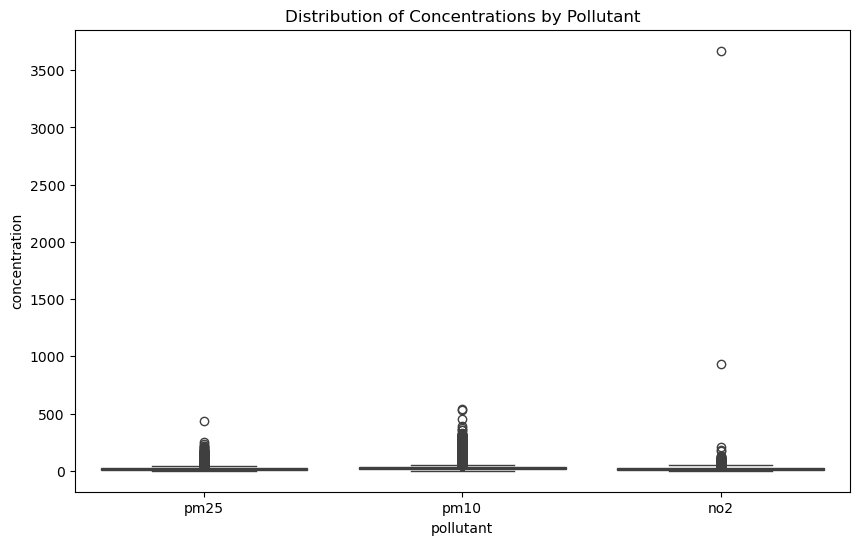

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot by pollutant
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="pollutant", y="concentration")
plt.title("Distribution of Concentrations by Pollutant")
plt.show()

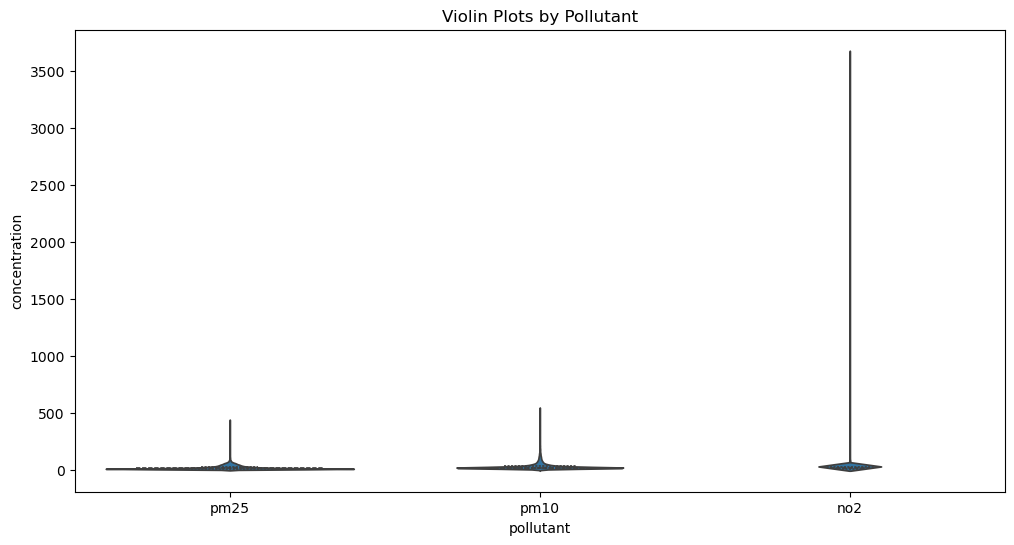

In [47]:
# Violin plot by pollutant
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x="pollutant", y="concentration", inner="quart")
plt.title("Violin Plots by Pollutant")
plt.show()

## Temporal Trends

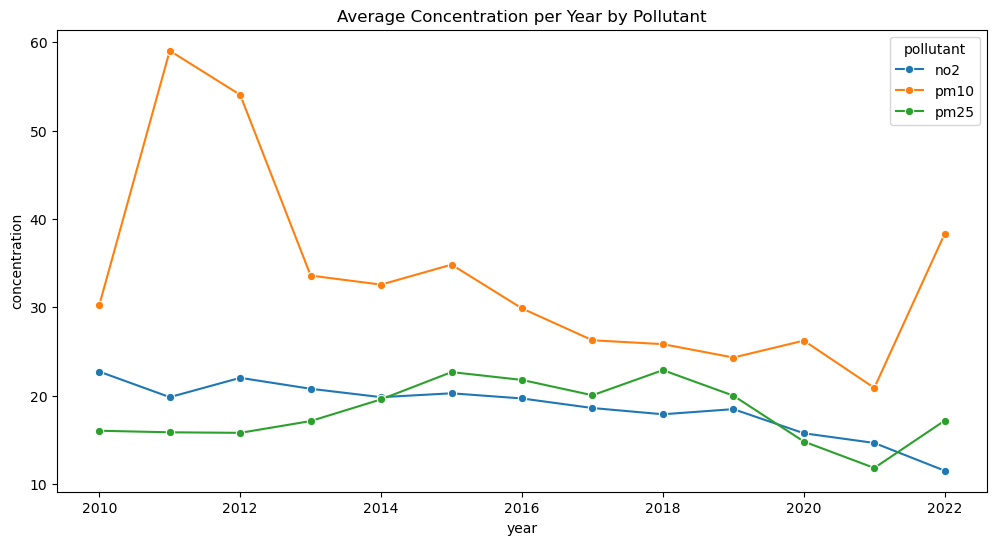

In [48]:
# Average concentration per year and pollutant
trend = df.groupby(["year","pollutant"])["concentration"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=trend, x="year", y="concentration", hue="pollutant", marker="o")
plt.title("Average Concentration per Year by Pollutant")
plt.show()


## Regional Comparison

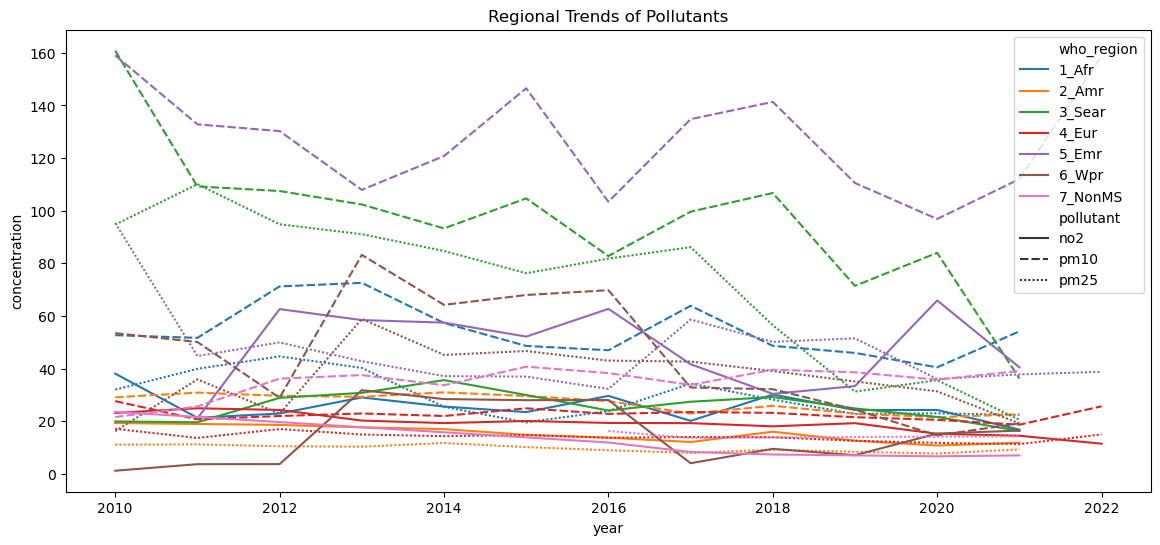

In [49]:
# Regional trends of pollutants
region_year = df.groupby(["who_region","year","pollutant"])["concentration"].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=region_year, x="year", y="concentration", hue="who_region", style="pollutant")
plt.title("Regional Trends of Pollutants")
plt.show()

## Hypothesis Testing

In [50]:
from scipy import stats

# Hypothesis: Compare PM2.5 between Traffic vs Background stations
pm25 = df[df["pollutant"]=="pm25"].dropna(subset=["concentration"])

if "type_of_stations" in df.columns:
    groups = pm25.groupby("type_of_stations")["concentration"].apply(list)
    if "Traffic" in groups and "Background" in groups:
        g1, g2 = groups["Traffic"], groups["Background"]
        # Normality test (sampled for speed)
        stat1, p1 = stats.shapiro(g1[:500])
        stat2, p2 = stats.shapiro(g2[:500])
        print("Shapiro p-values:", p1, p2)
        # Non-parametric Mann-Whitney if not normal
        stat, p = stats.mannwhitneyu(g1, g2, alternative="two-sided")
        print("Mann-Whitney U Test: p-value =", p)
    else:
        print("Not enough data for Traffic vs Background test")
else:
    print("No type_of_stations column available")

Shapiro p-values: 0.0005498079561001147 0.02849046229830824
Mann-Whitney U Test: p-value = 0.03325391993284308


### ANOVA Across Regions

In [51]:
# One-way ANOVA: compare PM2.5 means across WHO regions
pm25 = df[df["pollutant"]=="pm25"]
groups = [g["concentration"].dropna().values for _,g in pm25.groupby("who_region")]
stat, p = stats.f_oneway(*groups)
print("ANOVA p-value (PM2.5 across regions):", p)

ANOVA p-value (PM2.5 across regions): 0.0


## Correlation Analysis

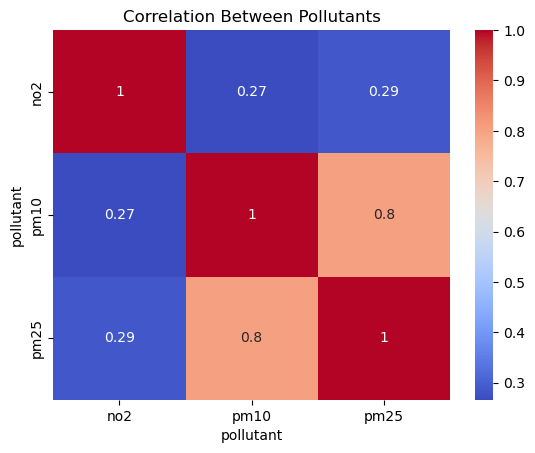

In [52]:
# Pivot pollutants to wide format to compute correlation
wide = df.pivot_table(index=["iso3","country_name","year"], columns="pollutant", values="concentration", aggfunc="mean")

# Correlation heatmap
corr = wide.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Pollutants")
plt.show()

# Summary

- **Descriptives**: PM2.5, PM10, and NO₂ differ in central tendency and spread.  
- **Trends**: Some regions show improvement, others worsening.  
- **Hypothesis tests**: Significant PM2.5 differences exist between station types and across WHO regions.  
- **Correlations**: Pollutants are moderately correlated, hinting at shared sources.  